# Iris Flower Dataset

Author: Tran Ta Bich Chau, 2020

## Overview
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.


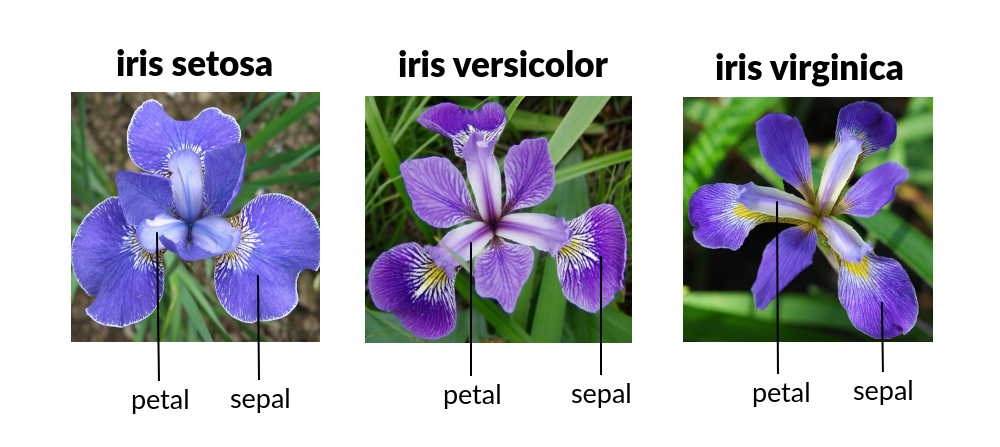

Picture: Classifying three types of Iris.
(source: https://www.datacamp.com/community/tutorials/machine-learning-in-r)

## Frame the Problem

Purpose: Practicing different Machine Learning models for classifying the respective label of each feature.

We want to predict the given sepal and petal dimensions follows to which type of species.
we have 3 type of species: Iris-setosa | Iris-versicolor | Iris-virginica.

There are two techniques we want to perform here and we will list out different models for each Machine Learning technique:
1. Supervised Learning:
We will split the data into trainset and testset to perform classification task:
    - Logistic regression
    - Decision tree
    - KNN
    - SVM
    - Random forest
    
    
2. Unsupervised Learning:
We will try to cluster using our available features as a preprocessing stage:
    - Hierarchical Clustering
    - K-Means Clustering
    - Principal Component Analysis

### Select a Performance Measure

In this section, our mission is to understand the approach to handle data and build a model to correctly classify the respective label of each image.

Therefore, the metrics we choose are Accuracy, Precision, Recall.

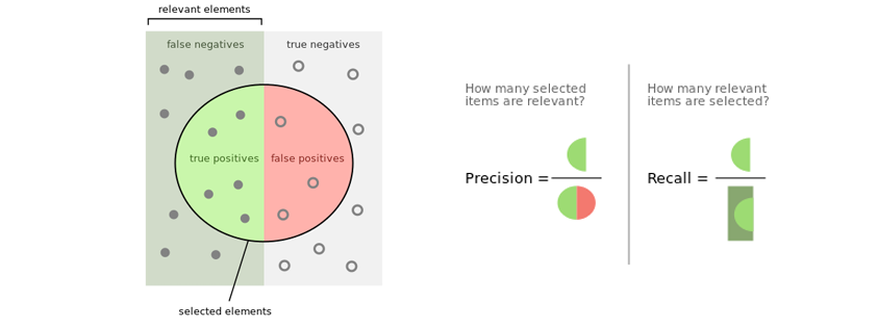

## Get the Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import re
from math import pi
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import chart_studio.plotly as py
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
sns.set(style="white", color_codes=True)
%matplotlib inline

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Checking if there are any missing values

### Take a Quick Look at the Data Struture

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Check how many samples for each species

In [6]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

<b>First Overview<b>:
- There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
- There are 50 observations of each species (setosa, versicolor, virginica).
- There is no missing value.
- All features are numerical.

Removing the id column because we do not need it in our research

In [7]:
data = data.drop(columns='Id')
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Take only the numerical features

In [10]:
corr = data.iloc[:, :4].corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


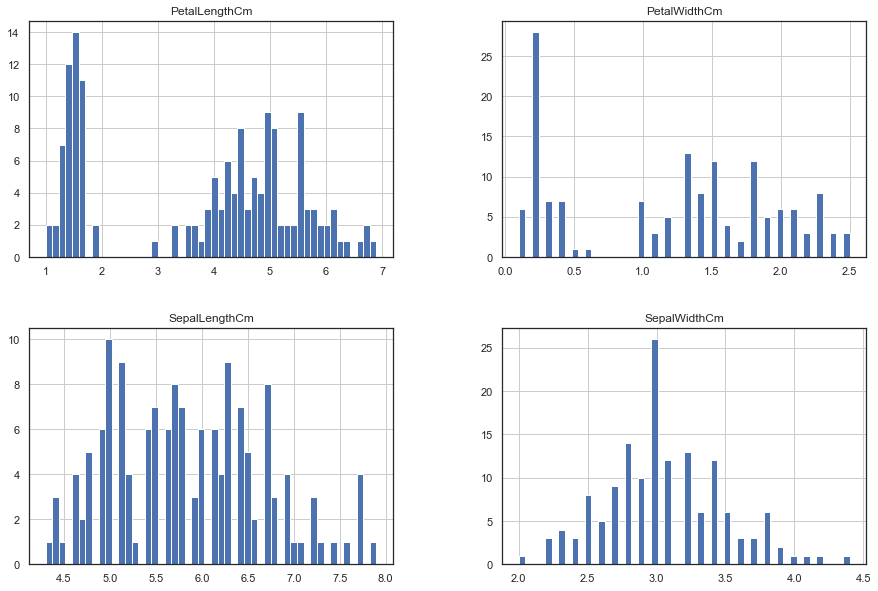

In [11]:
data.hist(bins=50, figsize=(15,10))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a13b9a0>,
      dtype=object)

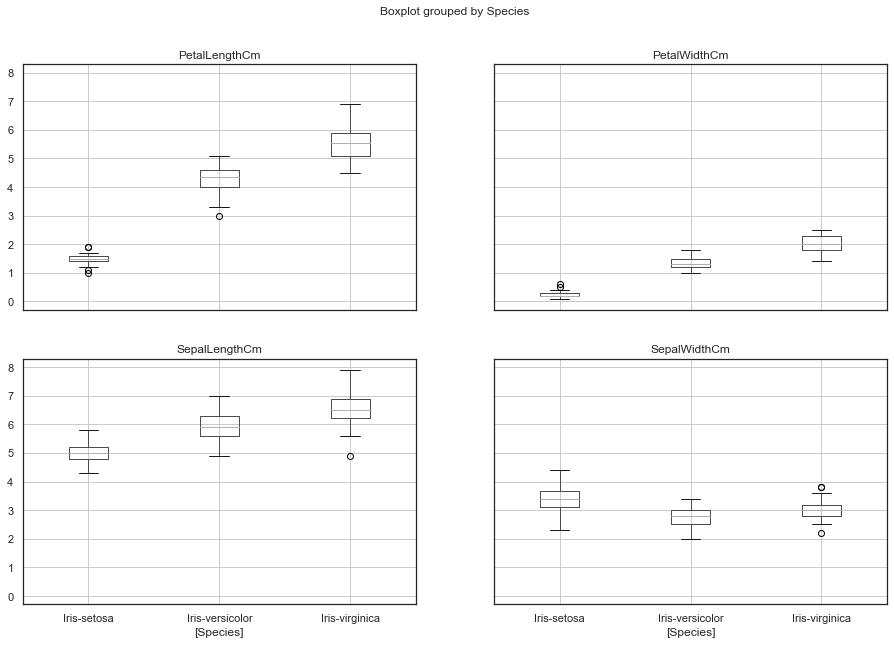

In [12]:
data.boxplot(by="Species", figsize=(15, 10))

From the above four graph we can see that:
- PetalLengththCm : The distribution of setosa < vericolor < virginica
- PetalWidthCm: The distribution of setosa < vericolor < virginica
- SepalLengththCm : The distribution of setosa < vericolor < virginica
- SepalWidthCm: The distribution of vericolor < virginica < setosa

- These 4 features are closely related to each other.
- The Sepal width feature does not seem to positive correlate with other feature.
- The features have quite different scales. It is safe to proceed for visualization. We might need to scale it later in the preprocessing step.

Tiny feature vs Huge feature

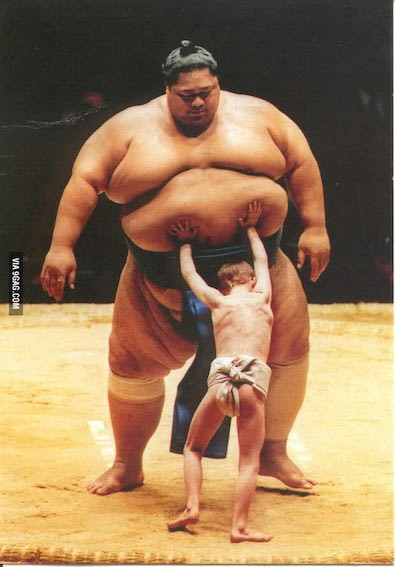

We can keep in mind a few outliers identified here to analyze later using the scatter plot graph.

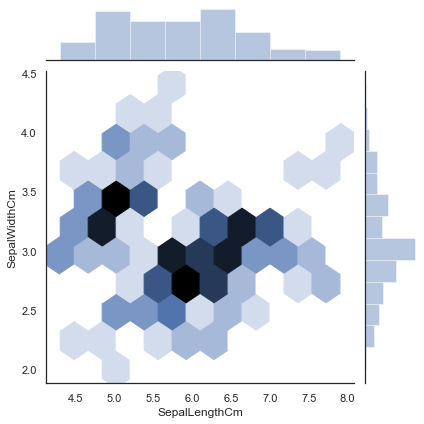

In [13]:
sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',kind='hex',data=data.iloc[:,:2])

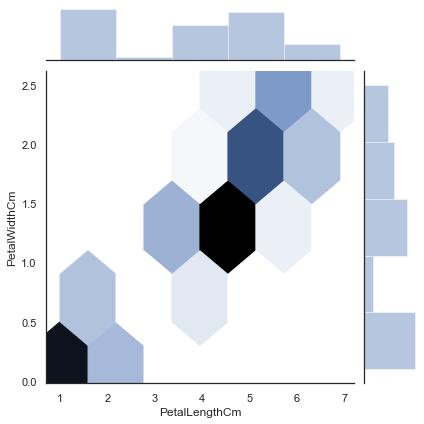

In [14]:
sns.jointplot(x='PetalLengthCm',y='PetalWidthCm',kind='hex',data=data)

### Create a test set

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

data = shuffle(data).reset_index(drop=True)

data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4.4,3.0,1.3,0.2,Iris-setosa
1,6.3,2.3,4.4,1.3,Iris-versicolor
2,6.0,2.9,4.5,1.5,Iris-versicolor
3,6.7,3.0,5.0,1.7,Iris-versicolor
4,5.0,3.2,1.2,0.2,Iris-setosa
...,...,...,...,...,...
145,6.0,2.2,5.0,1.5,Iris-virginica
146,6.7,3.1,4.4,1.4,Iris-versicolor
147,6.6,3.0,4.4,1.4,Iris-versicolor
148,6.4,3.2,4.5,1.5,Iris-versicolor


In [9]:
train_set, test_set = train_test_split(data, test_size=0.3, stratify= data['Species'],random_state=42)

In [10]:
print(train_set.shape)
print(test_set.shape)

(105, 5)
(45, 5)


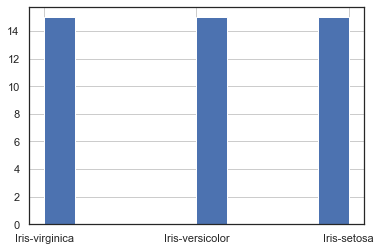

In [223]:
test_set['Species'].hist()

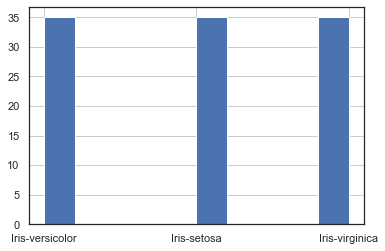

In [224]:
train_set['Species'].hist()

## Discover and Visualize the Data to Gain Insights

In [65]:
iris = train_set.copy()

<b>Spider Chart (Matplotlib)

A spider(radar) plot is a graphical method of displaying multivariate data in the form of a two-dimensional chart of three or more quantitative variables.


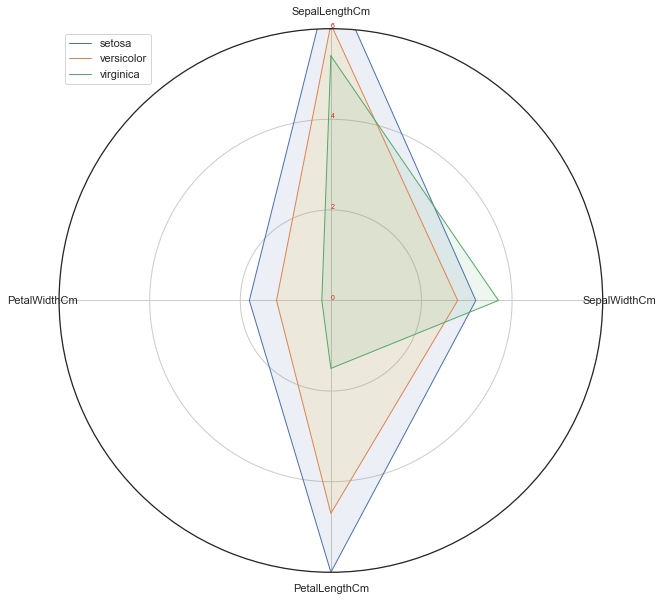

In [174]:
categories = list(iris)[:4]
n = len(categories) #4
angles = [ i / float(n)*2*pi for i in range(n)] #[0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469]
angles = angles + angles[:1] #[0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469, 0.0]

# I will pick the first 3 random values as representative of each species for this plot
#plot
plt.figure(figsize = (10,10))
ax = plt.subplot(111,polar = True)
ax.set_theta_offset(pi/2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1],categories)
ax.set_rlabel_position(0)
plt.yticks([0,2,4,6],["0","2","4","6"],color= "red", size = 7)
plt.ylim(0,6)

values = iris.loc[0].drop("Species").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="setosa" )
ax.fill(angles,values,"b",alpha=0.1)

values = data.loc[50].drop("Species").values.flatten().tolist()
values = values + values[:1] 
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="versicolor" )
ax.fill(angles,values,"orange",alpha=0.1)

values = iris.loc[100].drop("Species").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="virginica" )
ax.fill(angles,values,"g",alpha=0.1)

plt.legend(loc = "upper left")
plt.show()

In [175]:
iris.loc[100].drop("Species").values.flatten().tolist()

[5.4, 3.7, 1.5, 0.2]

In [176]:
iris.loc[0].drop("Species").values.flatten().tolist()

[7.2, 3.2, 6.0, 1.8]

In [177]:
iris.loc[50].drop("Species").values.flatten().tolist()

[6.1, 2.8, 4.7, 1.2]

It seems that except for the Sepal width, Virginica has the widest measurements among the three species. This is true according to our previous boxplot.
This overall finding leads us to the next plot.

### Looking for correlation

WARNING: The correlation coefficient only measures linear correlations (“if x goes up, then y generally goes up/down”). It may completely miss out on nonlinear relationships (e.g., “if x is close to 0, then y generally goes up”).

<b>Pairplot & Linear Regression Plot

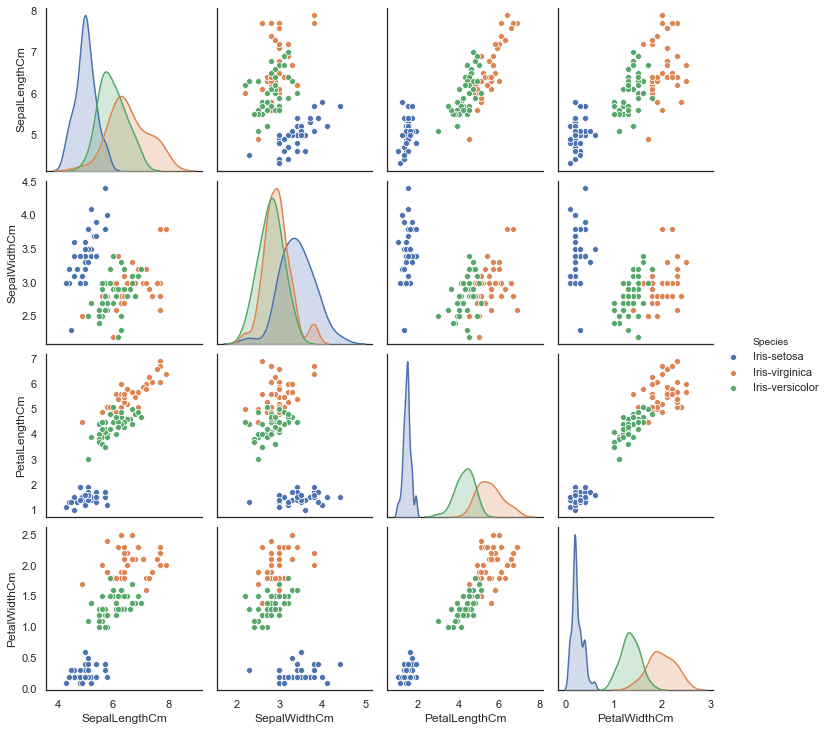

In [178]:
sns.pairplot(iris, hue='Species')

After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in blue) is distinctly different from those of the other two species.
There is some overlap in the pairwise relationships of the other two species, iris-versicolor (orange) and iris-virginica (green).

As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petal's features's can help in better and accurate Predictions over the Sepal's. We will check that later.

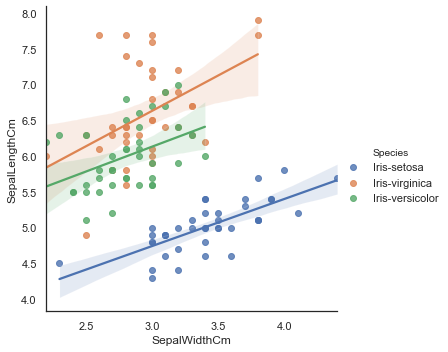

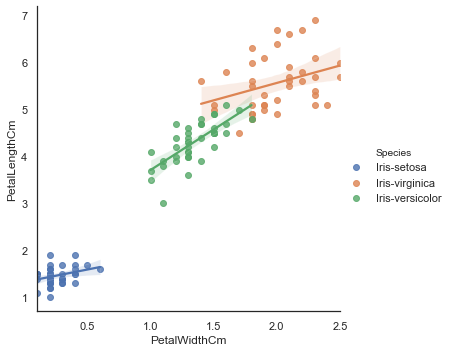

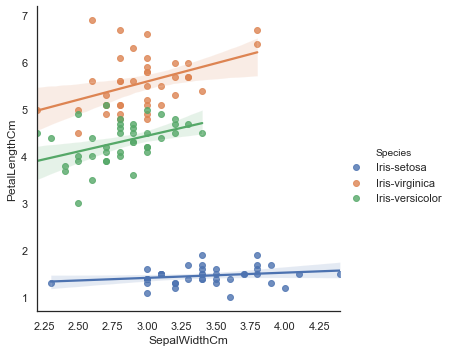

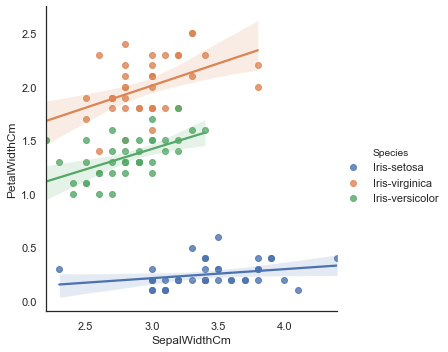

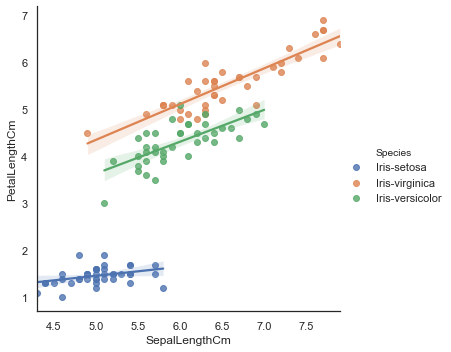

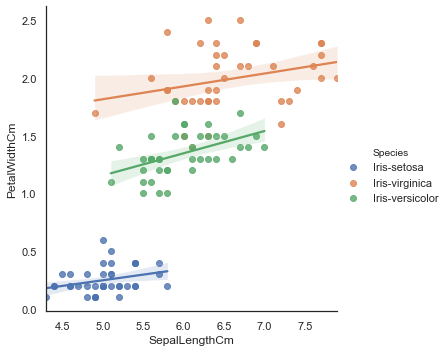

In [179]:
#Plot a simple linear relationship between two variables:

sns.lmplot(x="SepalWidthCm", y="SepalLengthCm", hue="Species", data=iris)
sns.lmplot(x="PetalWidthCm", y="PetalLengthCm", hue="Species", data=iris)
sns.lmplot(x="SepalWidthCm", y="PetalLengthCm", hue="Species", data=iris)
sns.lmplot(x="SepalWidthCm", y="PetalWidthCm", hue="Species", data=iris)
sns.lmplot(x="SepalLengthCm", y="PetalLengthCm", hue="Species", data=iris)
sns.lmplot(x="SepalLengthCm", y="PetalWidthCm", hue="Species", data=iris)

This plot produces quite an interesting visual result to compare between each species based on their four features.
Since our data of Petal Length and Petal Width has high correlation along the same axis, these correlated features could impact on classification accuracy.
We should look for yet another set of features that are less correlated with these data (for example: Sepal Width and Petal Length?)

However, it is noticable that this approach still fails to illustrate the joint relationship of all variables (sepal_length, sepal_width, petal_length, and petal_width).

<b> Basic 3D Scatter Plot
    
Library used: go.Scatter3d: 3D scatter
    
We will plot iris setosa and iris virginica classes according to their Sepal Length(x), Sepal Width(y), and Petal Length(z).

In [180]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], dtype=object)

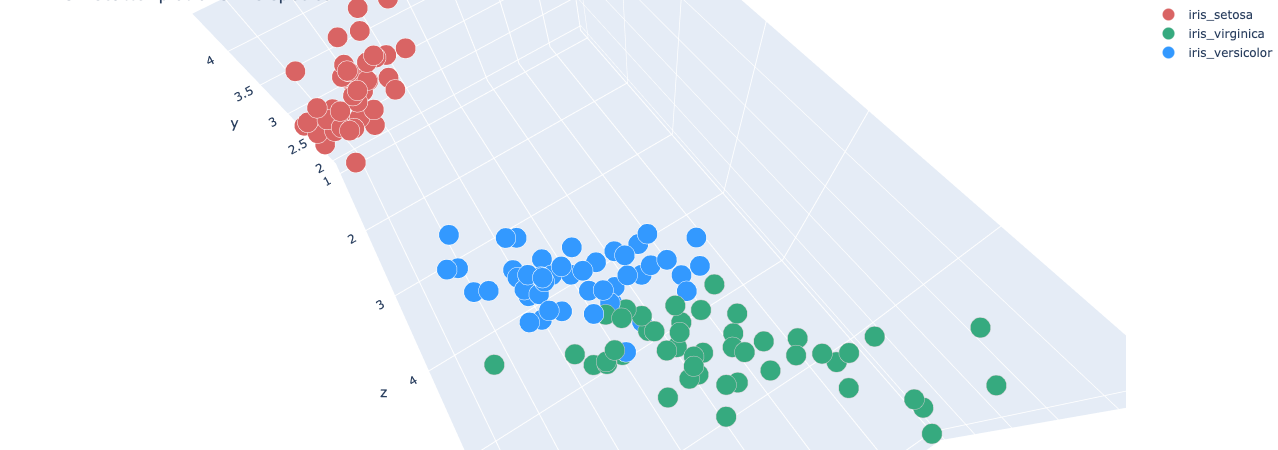

In [24]:
# data of iris setosa
iris_setosa = data[data['Species'] == "Iris-setosa"]
# # data of iris virginica
iris_virginica = data[data['Species'] == "Iris-virginica"]
# # data of iris virginica
iris_versicolor = data[data['Species'] == "Iris-versicolor"]

# trace1 =  iris setosa
trace1 = go.Scatter3d(
    x=iris_setosa.SepalLengthCm,
    y=iris_setosa.SepalWidthCm,
    z=iris_setosa.PetalLengthCm,
    mode='markers',
    name = "iris_setosa",
    marker=dict(
        color='rgb(217, 100, 100)',
        size=12,
        line=dict(
            color='rgb(255, 255, 255)',
            width=0.1
        )
    )
)
# trace2 =  iris virginica
trace2 = go.Scatter3d(
    x=iris_virginica.SepalLengthCm,
    y=iris_virginica.SepalWidthCm,
    z=iris_virginica.PetalLengthCm,
    mode='markers',
    name = "iris_virginica",
    marker=dict(
        color='rgb(54, 170, 127)',
        size=12,
        line=dict(
            color='rgb(204, 204, 204)',
            width=0.1
        )
    )
)

trace3 = go.Scatter3d(
    x=iris_versicolor.SepalLengthCm,
    y=iris_versicolor.SepalWidthCm,
    z=iris_versicolor.PetalLengthCm,
    mode='markers',
    name = "iris_versicolor",
    marker=dict(
        color='rgb(51, 153, 255)',
        size=12,
        line=dict(
            color='rgb(255, 255, 255)',
            width=0.1
        )
    )
)

data1 = [trace1, trace2, trace3]
layout = go.Layout(
    title = ' 3D scatter plot of 3 Iris species',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data1, layout=layout)
iplot(fig)

We want to try seeing it in 4D as well.


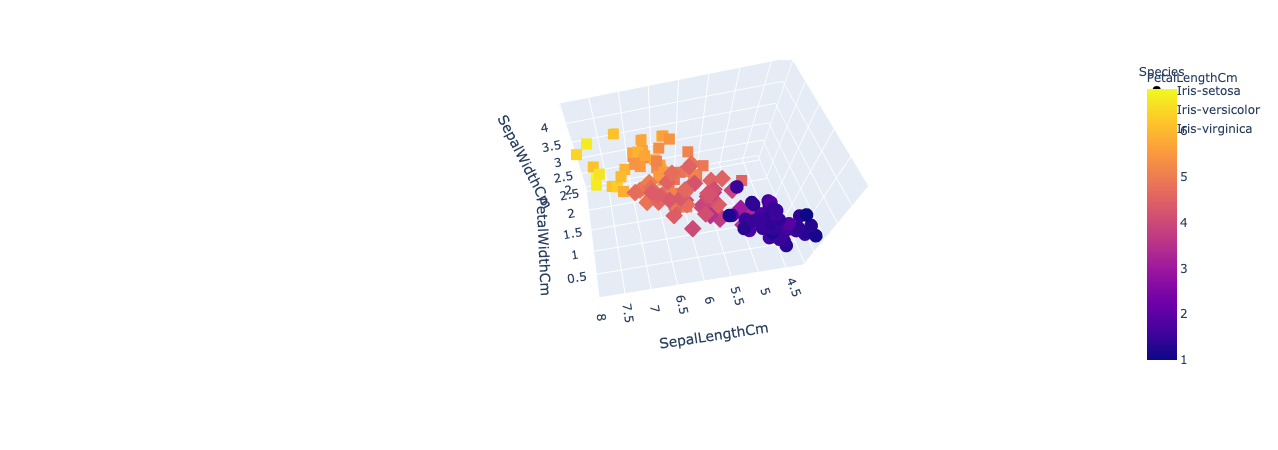

In [28]:
df = data.copy()
fig = px.scatter_3d(df, x='SepalLengthCm', y='SepalWidthCm', z='PetalWidthCm',
              color='PetalLengthCm', symbol='Species')
fig.show()

Viewing multivariate data is a challenge, but fortunately we can rely on some statistical methods that can "compact" the data into fewer dimensions. One such method is Principal Component Analysis (PCA).

<b>Principal Component Analysis: Dimensionality Reduction for Data Visualization
    
The objective of the PCA is to summarize the data through components that best explain its variance. It is important to note that in performing such a procedure, some of the information contained will certainly be lost. For data visualization, PCA is useful since most of the information can be explained by 2 or 3 dimensions.
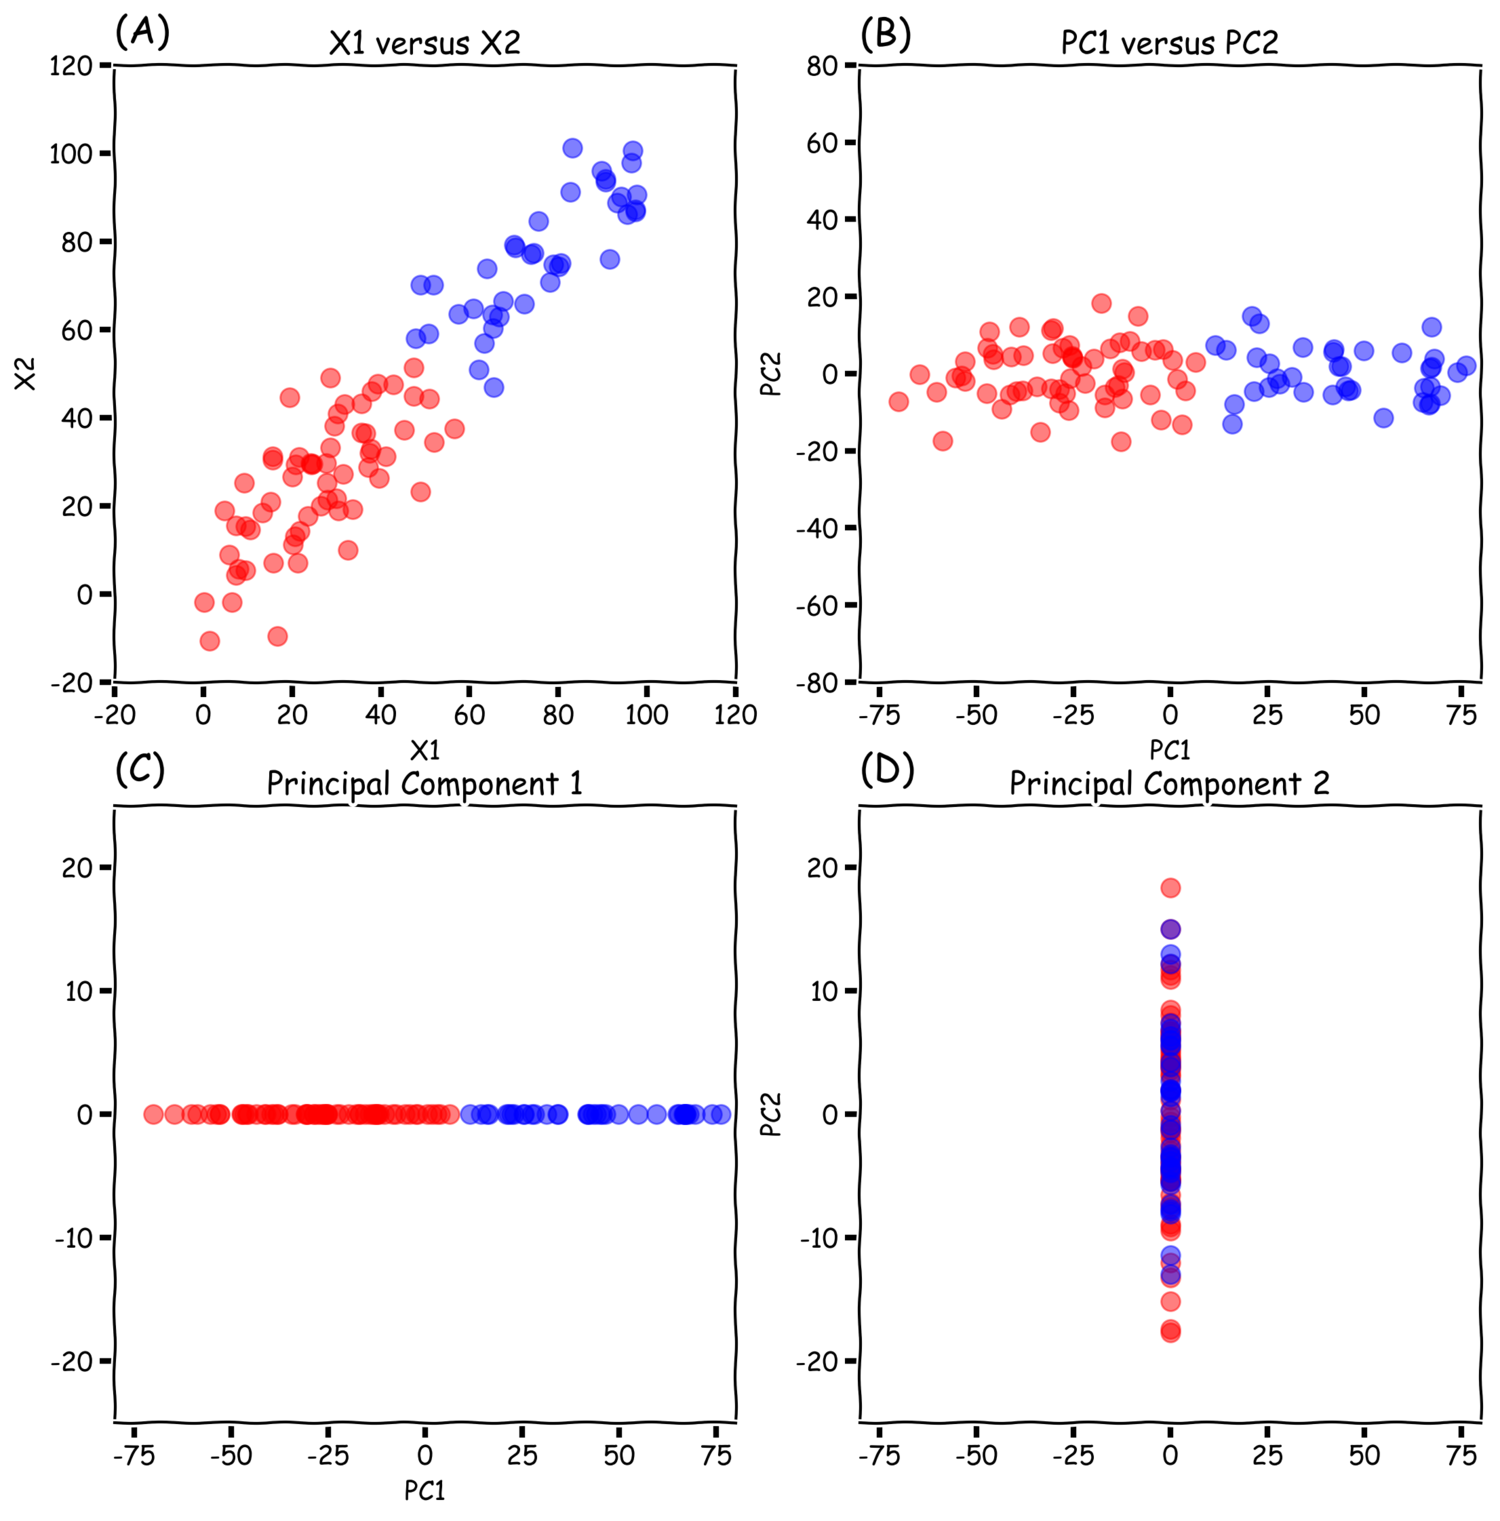

In [31]:
from time import time
from sklearn.decomposition import PCA

In [32]:
classes = data['Species'].unique().tolist()
iris = data.copy()

In [39]:
n_components = 2 #k the number of component to return
X = np.array(iris[[c for c in iris.columns if c != "Species" and c!='Id']])
Y = iris["Species"]
color = LabelEncoder().fit_transform(Y)

In [40]:
color

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [45]:
t0 = time()
pca = PCA(n_components=n_components)
pca_df = pca.fit_transform(X)
pca_df = pd.DataFrame({'pc1': pca_df[:, 0], 'pc2': pca_df[:, 1], 'class': Y})
t1 = time()
pca_df.head()

,pc1,pc2,class
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa


In [48]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

The percentage of variance explained by each of the selected components in total is up to 97%.
This means that in only 2 dimensions, PCA is able to explain more than 97% of the information in the original data set, which has 4 variables.

PCA: 0.0013 sec


(-3.576194811649227,
 4.145681226584217,
 -1.3941427533540638,
 1.5021748354682571)

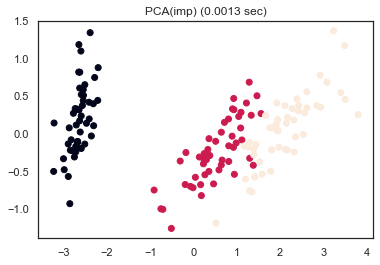

In [54]:
print("PCA: %.2g sec" % (t1 - t0))
plt.scatter(pca_df['pc1'], pca_df['pc2'], c=color)
plt.title("PCA(imp) (%.2g sec)" % (t1 - t0))
plt.axis('tight')

In this case, each data point has been labelled as belonging to the black, red or vanilla group.  
The labels are separable by their direction of highest variance (PC1).

## Prepare the Data for ML algorithms

### Data Cleaning

### Feature Scaling

One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales.

There are two common ways to get all attributes to have the same scale: min-max scaling(normalization) and standardization.

- Min-Max-Scaling: values are shifted so that they end up ranging from 0 to 1. Scikit-learn provides a transformer called MinMaxScaler for this.

- Standardization: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance. Standardization does not bound values to a specific range, and is much less affected by outliers. Scikit-learn provides a transformer called StandardScaler for this.

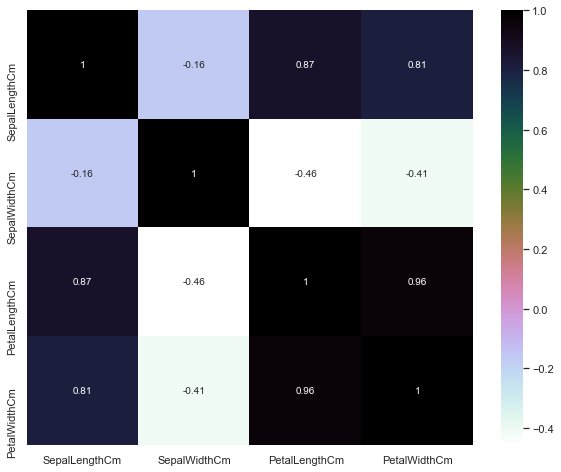

In [183]:
plt.figure(figsize=(10,8)) 
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

<b>Observation--->

The Sepal Width and Length are not really correlated, while the Petal Width and Length are highly correlated.

We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated.
Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

## Transformation Pipeline

As you can see, there are many data transformation steps that need to be executed in the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with such sequences of transformations. Here is a small pipeline for the numerical attributes:

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [67]:
iris_num = iris.drop('Species', axis = 1)
iris_num.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
147,6.6,3.0,4.4,1.4
63,6.0,3.4,4.5,1.6
45,4.6,3.1,1.5,0.2
134,4.9,2.5,4.5,1.7
148,6.4,3.2,4.5,1.5


In [90]:
num_pipeline = Pipeline([
                        ('std_scaler', StandardScaler()),
                        ])

iris_num_tr = num_pipeline.fit_transform(iris_num)

So far, we have handled the numerical columns separately. It would be more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column.

In [91]:
from sklearn.compose import ColumnTransformer

num_attribs = list(iris_num)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])

iris_prepared = full_pipeline.fit_transform(iris)

In [92]:
iris_prepared[:5]

array([[ 0.89881401, -0.14347353,  0.33701684,  0.25171344],
       [ 0.20231607,  0.78358618,  0.39274403,  0.51339574],
       [-1.42284579,  0.0882914 , -1.27907177, -1.31838032],
       [-1.07459682, -1.30229817,  0.39274403,  0.64423689],
       [ 0.66664803,  0.32005633,  0.39274403,  0.38255459]])

## Select and Train a Model

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [84]:
X_train = train_set[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
X_test = test_set[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features

y_train = train_set.Species# output of our training data
y_test = test_set.Species   #output value of test data

In [254]:
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)
y_test

array([2, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2,
       1])

### Supervised Learning

#### Random Forest

In [256]:
rfc = RandomForestClassifier()

In [257]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

The accuracy of the Random Forest is 0.9555555555555556


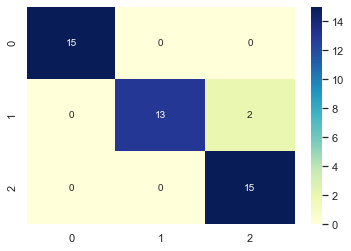

In [258]:
rfc_pred = rfc.predict(X_test)
print('The accuracy of the Random Forest is', accuracy_score(y_test, rfc_pred))
rfc_matrix = confusion_matrix(y_test, rfc_pred)
sns.heatmap(rfc_matrix,cmap="YlGnBu", annot=True, fmt="d")

#### Support Vector Machine

In [259]:
svc = svm.SVC()

In [260]:
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

The accuracy of the Support Vector Machine is 0.9555555555555556


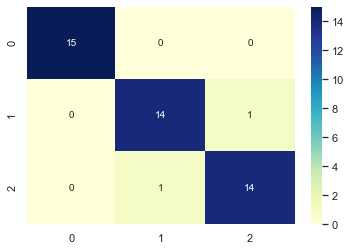

In [261]:
svc_pred = svc.predict(X_test)
print('The accuracy of the Support Vector Machine is', accuracy_score(y_test, svc_pred))
svc_matrix = confusion_matrix(y_test, svc_pred)
sns.heatmap(svc_matrix,cmap="YlGnBu", annot=True, fmt="d")

#### Logistic Regression

In [262]:
lrc = LogisticRegression()

In [263]:
lrc.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The accuracy of the Decision Tree is 0.9555555555555556


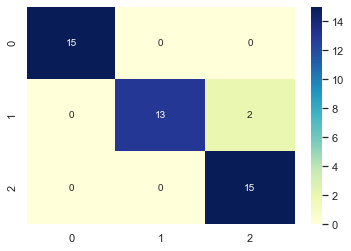

In [264]:
lrc_pred = lrc.predict(X_test)
print('The accuracy of the Decision Tree is', accuracy_score(y_test, lrc_pred))
lrc_matrix = confusion_matrix(y_test, lrc_pred)
sns.heatmap(lrc_matrix,cmap="YlGnBu", annot=True, fmt="d")

#### Decision Tree

In [265]:
dtc = DecisionTreeClassifier()

In [266]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

The accuracy of the Decision Tree is 0.8888888888888888


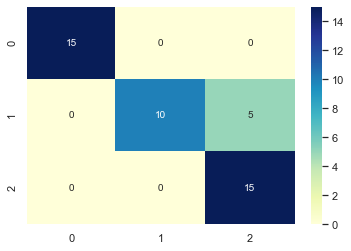

In [267]:
dtc_pred = dtc.predict(X_test)
print('The accuracy of the Decision Tree is', accuracy_score(y_test, dtc_pred))
dtc_matrix = confusion_matrix(y_test, dtc_pred)
sns.heatmap(dtc_matrix,cmap="YlGnBu", annot=True, fmt="d")

Pros of Decision Tree:
- Simple to understand and visualize
- Fast to identify significant variables, useful for quick data exploration
- Relatively insensitive to outlier, not much data clearning require
- Non-parametric, no assumption about data

Cons of Decision Tree:
- Overfitting : could be solved by random forest
- Suboptimal decision tree: Greedy algorithm can't guarantee globally optimal tree, solved by RF
- Information lost: When work with continous variable, information might be loose when it categorizes variables by making cut-offs

Setting constrains to prevent overfitting
If we let Decision Tree to make split until it ends up with homogenous set in all leaves, for data with different groups of samples overlapping each other a lot, overfitting might occur and we might observe some leaves with only 1 or 2 samples. To avoid that, we could put these constrains to the decision tree:

- Minimum samples for a node split and each terminal node
- Maximum depth of tree
- Maximum number of nodes
- Maximum features to consider to split

In [ ]:
dtree = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=5)

#### K-Nearest Neighbours

In [268]:
knn = KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class

In [269]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

The accuracy of the KNN is 0.9555555555555556


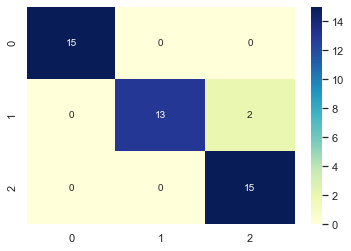

In [270]:
knn_pred = knn.predict(X_test)
print('The accuracy of the KNN is', accuracy_score(y_test,knn_pred))
knn_matrix = confusion_matrix(y_test, knn_pred)
sns.heatmap(knn_matrix,cmap="YlGnBu", annot=True, fmt="d")

<b>Create a table to sum up our result of different baseline models

It is noticable according to our confusion matrix is that all of our models are confused between group 1 and 2. We could improve this by gathering more datas to train our models with.

In [281]:
pd.DataFrame({'Logistic Regression': [accuracy_score(y_test,lrc_pred)],
              'Random Forest': [accuracy_score(y_test, rfc_pred)],
              'Decision Tree': [accuracy_score(y_test, dtc_pred)],
              'Support Vector Machine': [accuracy_score(y_test,svc_pred)],
              'K-Nearest Neighbors': [accuracy_score(y_test,knn_pred)]
             })

,Logistic Regression,Random Forest,Decision Tree,Support Vector Machine,K-Nearest Neighbors
0,0.955556,0.955556,0.888889,0.955556,0.955556


### Unsupervised Learning:

#### PCA
Now, let us see how the standardization affects PCA and a following supervised classification on the whole Iris dataset.

Standardization of features will have an effect on the outcome of a PCA (assuming that the variables are originally not standardized). This is because we are scaling the covariance between every pair of variables by the product of the standard deviations of each pair of variables.

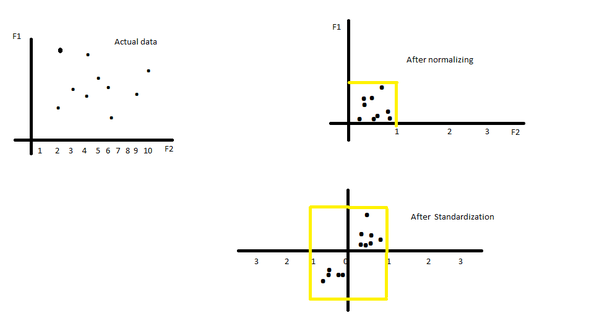

In the following section, we will go through the following steps:

- Make a copy of the dataset
- Dividing the dataset into a separate training and test dataset
- Standardization of the features
- Principal Component Analysis (PCA) to reduce the dimensionality
- Training a Logistic Regression Classifier
- Evaluating the classification accuracy with and without standardization

<b>Make a copy of the dataset

In [146]:
pca_data = data.copy()
X = pca_data.values[:,:4]
y = pca_data.values[:,4]
y = LabelEncoder().fit_transform(y)

<b>Dividing the dataset into a separate training and test dataset

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=1)

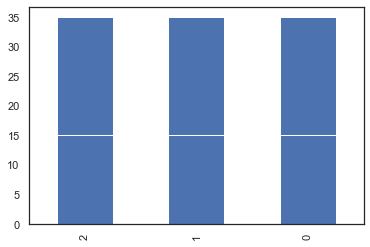

In [244]:
ytrain_df = pd.DataFrame(y_train)
ytest_df = pd.DataFrame(y_test)

ytrain_df[0].value_counts().plot(kind='bar')
ytest_df[0].value_counts().plot(kind='bar')

<b>Feature Scaling - Standardization

In [245]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

<b>Principal Component Analysis (PCA) to reduce the dimensionality

Now, we perform a PCA on the standardized and the non-standardized datasets to transform the dataset onto a 2-dimensional feature subspace.
In a real application, a procedure like cross-validation would be done in order to find out what choice of features would yield a optimal balance between “preserving information” and “overfitting” for different classifiers. However, we will omit this step since we don’t want to train a perfect classifier here, but merely compare the effects of standardization.

In [246]:
# on non-standardized data
pca = PCA(n_components=2).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [247]:
# on standardized data
pca_std = PCA(n_components=2).fit(X_train_std)
X_train_std = pca_std.transform(X_train_std)
X_test_std = pca_std.transform(X_test_std)

Let us quickly visualize how our new feature subspace looks like (note that class labels are not considered in a PCA - in contrast to a Linear Discriminant Analysis - but I will add them in the plot for clarity).

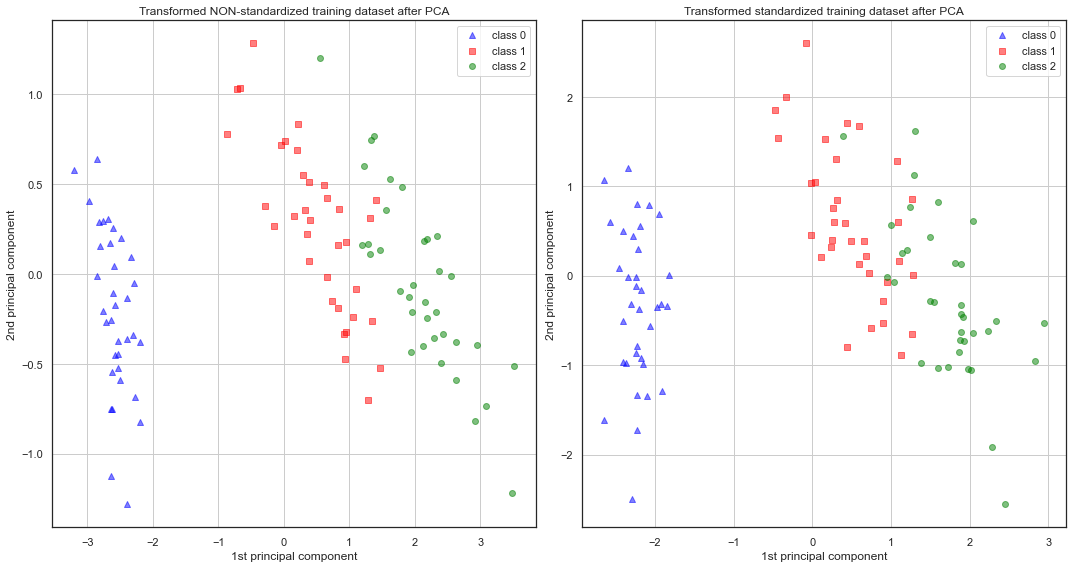

In [248]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,8))


for l,c,m in zip(range(0,3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train[y_train==l, 0], X_train[y_train==l, 1],
        color=c,
        label='class %s' %l,
        alpha=0.5,
        marker=m
        )

for l,c,m in zip(range(0,3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train==l, 0], X_train_std[y_train==l, 1],
        color=c,
        label='class %s' %l,
        alpha=0.5,
        marker=m
        )

ax1.set_title('Transformed NON-standardized training dataset after PCA')    
ax2.set_title('Transformed standardized training dataset after PCA')    

for ax in (ax1, ax2):

    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()
plt.tight_layout()

plt.show()  

<b>Training a Logistic Regression Classifier

In [249]:
from sklearn.linear_model import LogisticRegression

# on non-standardized data
pca_lr = LogisticRegression()
fit = pca_lr.fit(X_train, y_train)

# on standardized data
pca_lr_std = LogisticRegression()
fit_std = pca_lr_std.fit(X_train_std, y_train)

<b>Evaluating the classification accuracy with and without standardization

In [250]:
from sklearn.metrics import accuracy_score

pred_train = pca_lr.predict(X_train)

print('\nPrediction accuracy for the training dataset without standadization')
print('{:.2%}'.format(accuracy_score(y_train, pred_train)))

pred_test = pca_lr.predict(X_test)

print('\nPrediction accuracy for the test dataset without standadization')
print('{:.2%}\n'.format(accuracy_score(y_test, pred_test)))


Prediction accuracy for the training dataset without standadization
96.19%

Prediction accuracy for the test dataset without standadization
97.78%



In [251]:
pred_train_std = pca_lr_std.predict(X_train_std)

print('\nPrediction accuracy for the training dataset with standadization')
print('{:.2%}'.format(accuracy_score(y_train, pred_train_std)))

pred_test_std = pca_lr_std.predict(X_test)

print('\nPrediction accuracy for the test dataset with standadization')
print('{:.2%}\n'.format(accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the training dataset with standadization
92.38%

Prediction accuracy for the test dataset with standadization
91.11%



As we can see, the standardization prior to the PCA led to an increase in the empirical error rate on classifying samples from test dataset.
This led me to understand that, a rule of thumb, if all your variables are measured on the same scale and have the same unit, it might be a good idea *not* to scale the variables (i.e., PCA based on the covariance matrix). If you want to maximize variation, it is fair to let variables with more variation contribute more. On the other hand, if you have different types of variables with different units, it is probably wise to scale the data first (i.e., PCA based on the correlation matrix).

This prediction using PCA without standadization is much higher than supervised models. This could be explained due to the fact that PCA seeks the direction that maximises the variance and scaling the data differently changes the PCA vectors.
For the multi-variate Gaussian distribution, scaling the data with respect to their standard deviation and not scaling gives different PCA vectors. One extreme scenario is when the two uncorrelated variables have the same standard deviation (i.e. after standardisation), the PCA vector is purely noise driven and would be misleading . This could be our case.

## Fine-Tune Our Models

### Feature Selection

We used all the features of iris in above models. Now we will use Petals and Sepals Seperately.

<b>Creating Petals (highly correlated), Sepals(not correlated), and a mixture of 2 features(highly uncorrelated) as Training Datas:

In [11]:
petal = data[['PetalLengthCm','PetalWidthCm','Species']]
sepal = data[['SepalLengthCm','SepalWidthCm','Species']]

In [12]:
X_petal = petal[['PetalLengthCm','PetalWidthCm']]
y_petal = petal['Species']

Xpetal_train, Xpetal_test, ypetal_train, ypetal_test = train_test_split(X_petal, y_petal, test_size = 0.3, stratify=y_petal, random_state=1)

In [13]:
X_sepal = sepal[['SepalLengthCm','SepalWidthCm']]
y_sepal = sepal['Species']

Xsepal_train, Xsepal_test, ysepal_train, ysepal_test = train_test_split(X_sepal, y_sepal, test_size = 0.3, stratify=y_sepal, random_state=1)

In [14]:
ps = data[['PetalLengthCm','SepalWidthCm','Species']]
ps.shape

(150, 3)

In [15]:
X_ps = ps[['PetalLengthCm','SepalWidthCm']]
y_ps = ps['Species']

Xps_train, Xps_test, yps_train, yps_test = train_test_split(X_ps, y_ps, test_size = 0.3, stratify=y_ps, random_state=1)

#### Logistic Regression

In [297]:
model = LogisticRegression()

model.fit(Xpetal_train, ypetal_train) 
prediction = model.predict(Xpetal_test) 
print('The accuracy of the Logistic Regression using Petals is:',accuracy_score(ypetal_test, prediction))

model.fit(Xsepal_train, ysepal_train) 
prediction = model.predict(Xsepal_test) 
print('The accuracy of the Logistic Regression using Sepals is:',accuracy_score(ysepal_test, prediction))

model.fit(Xps_train, yps_train) 
prediction = model.predict(Xps_test) 
print('The accuracy of the Logistic Regression using MixSet is:',accuracy_score(yps_test, prediction))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.7777777777777778
The accuracy of the Logistic Regression using MixSet is: 0.9555555555555556


#### Support Vector Machine

In [299]:
model = svm.SVC()

model.fit(Xpetal_train, ypetal_train) 
prediction = model.predict(Xpetal_test) 
print('The accuracy of the Support Vector Machine using Petals is:',accuracy_score(ypetal_test, prediction))

model.fit(Xsepal_train, ysepal_train) 
prediction = model.predict(Xsepal_test) 
print('The accuracy of the Support Vector Machine using Sepals is:',accuracy_score(ysepal_test, prediction))

model.fit(Xps_train, yps_train) 
prediction = model.predict(Xps_test) 
print('The accuracy of the Support Vector Machine using MixSet is:',accuracy_score(yps_test, prediction))

The accuracy of the Support Vector Machine using Petals is: 0.9555555555555556
The accuracy of the Support Vector Machine using Sepals is: 0.7555555555555555
The accuracy of the Support Vector Machine using MixSet is: 0.9555555555555556


There are three main parameters which we could try out with when constructing a SVM classifier:

- Type of kernel
- Gamma value
- C value

To better illustrate how the parameters could affect the outcome of the classifier, we use only 2 of the input attributes, so we could visualize the results on a figure.

In [43]:
X,y = data.iloc[:,1:3], pd.factorize(data['Species'])[0]

# Define the boundaries for the graphs we will draw later
x_min, x_max = X.iloc[:,0].min() - 1, X.iloc[:,0].max() + 1  #(1.0, 5.4)
y_min, y_max = X.iloc[:,1].min() - 1, X.iloc[:,1].max() + 1  #(0.0, 7.9)
h = (x_max / x_min)/100

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [44]:
xx.ravel() #Return a contiguous flattened array.

array([1.   , 1.054, 1.108, ..., 5.266, 5.32 , 5.374])

In [45]:
yy.ravel() #Return a contiguous flattened array.

array([0.   , 0.   , 0.   , ..., 7.884, 7.884, 7.884])

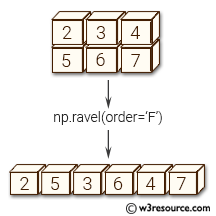

In [46]:
# Defining a function that declare a SVM classifier, with different parameters, and make predictions
def make_mesh(kerneltype, Cval, gammaval="auto"):
    svc = svm.SVC(kernel=kerneltype, C=Cval,gamma=gammaval)
    svc.fit(X, y)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return (Z)

There are different type of kernel:
It could be either "linear", "poly" (polynomial), "sigmoid", etc.
The one on the left is "linear", and the hyperplanes will be linear.

The hyperplanes could also be non-linear as shown on the right side. We will choose the kernel typy of "rbf", which stands for Radial Basis Function. Other non-linear kernel include poly, i.e. polynomial functions (but we need to specify the degree).

Text(0.5, 1.0, 'SVC with rbf kernel')

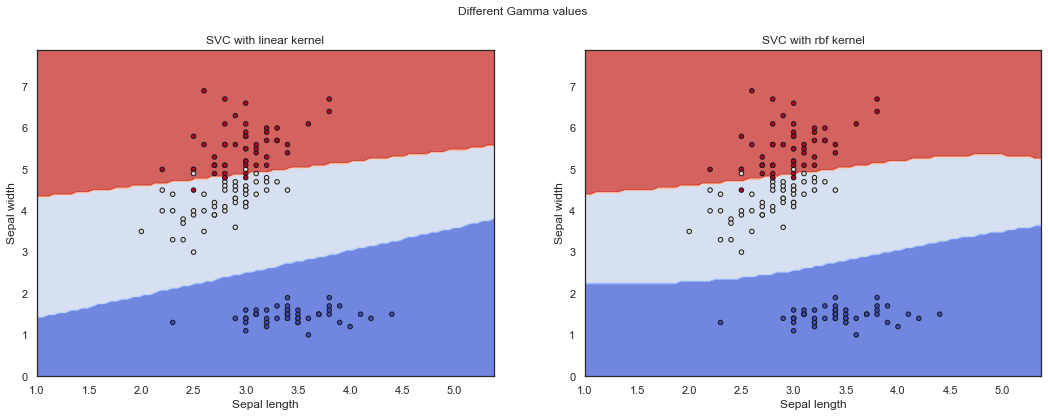

In [51]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))
fig.suptitle('Different Gamma values')

Z = make_mesh("linear", 1, gammaval="auto")
ax1.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap=plt.cm.coolwarm,s=20, edgecolors='k')
ax1.set_xlabel('Sepal length')
ax1.set_ylabel('Sepal width')
ax1.set_xlim(xx.min(), xx.max())
ax1.set_title('SVC with linear kernel')

Z = make_mesh("rbf", 1, gammaval="auto")
ax2.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X.iloc[:,0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm,s=20, edgecolors='k')
ax2.set_xlabel('Sepal length')
ax2.set_ylabel('Sepal width')
ax2.set_xlim(xx.min(), xx.max())
ax2.set_title('SVC with rbf kernel')

Gamma value: It is essential for rbf, poly and sigmoid kernel. Higher the gamma value, more influence a single training examples has and the more it will try to exactly fit the data

Text(0.5, 1.0, 'Gamma = 100')

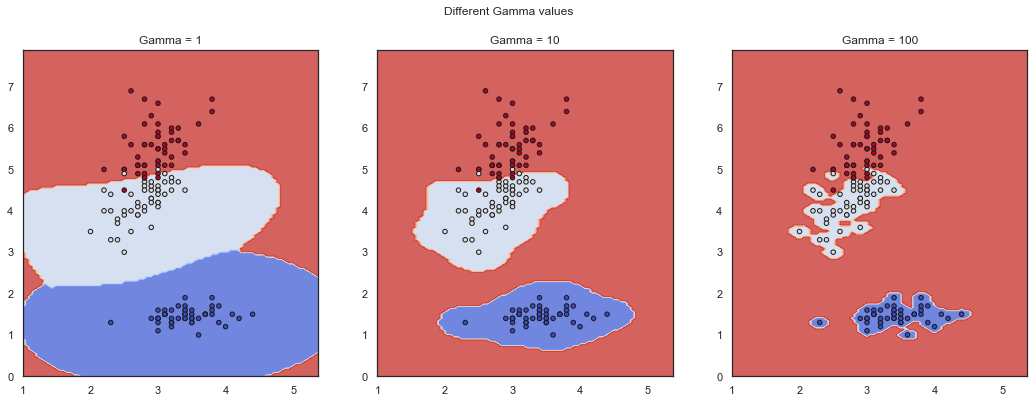

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,6))
fig.suptitle('Different kernel')

Z = make_mesh("rbf", 1, gammaval=1)
ax1.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm,s=20, edgecolors='k')
ax1.set_title("Gamma = 1")

Z = make_mesh("rbf", 1, gammaval=10)
ax2.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm,s=20, edgecolors='k')
ax2.set_title("Gamma = 10")

Z = make_mesh("rbf", 1, gammaval=100)
ax3.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
ax3.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm,s=20, edgecolors='k')
ax3.set_title("Gamma = 100")

C value: C is the regularization parameter. Higher the C value, the more it will try to classify all data correctly. Lower the C value, smoother is decision boundary

Text(0.5, 1.0, 'C = 100')

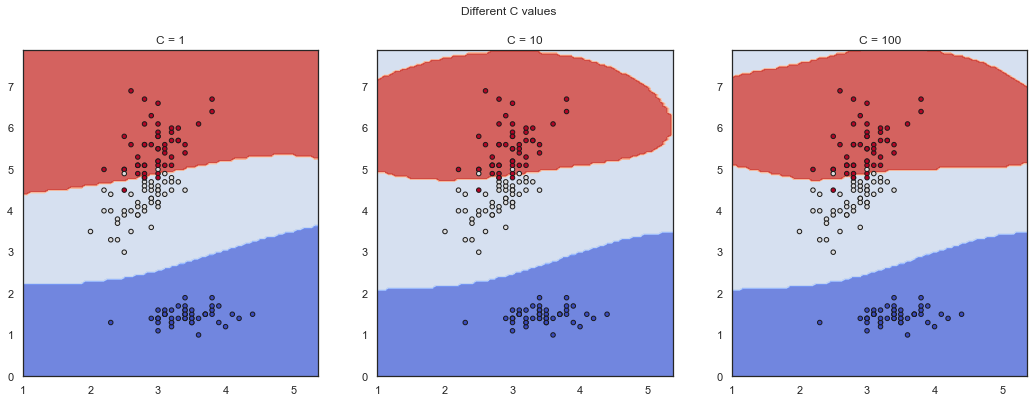

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,6))
fig.suptitle('Different C values')

Z = make_mesh("rbf", 1, gammaval="auto")
ax1.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm,s=20, edgecolors='k')
ax1.set_title("C = 1")

Z = make_mesh("rbf", 10, gammaval="auto")
ax2.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm,s=20, edgecolors='k')
ax2.set_title("C = 10")

Z = make_mesh("rbf", 100, gammaval="auto")
ax3.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
ax3.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm,s=20, edgecolors='k')
ax3.set_title("C = 100")

#### Random Forest

In [301]:
model = RandomForestClassifier()

model.fit(Xpetal_train, ypetal_train) 
prediction = model.predict(Xpetal_test) 
print('The accuracy of the Random Forest using Petals is:',accuracy_score(ypetal_test, prediction))

model.fit(Xsepal_train, ysepal_train) 
prediction = model.predict(Xsepal_test) 
print('The accuracy of the Random Forest using Sepals is:',accuracy_score(ysepal_test, prediction))

model.fit(Xps_train, yps_train) 
prediction = model.predict(Xps_test) 
print('The accuracy of the Random Forest using MixSet is:',accuracy_score(yps_test, prediction))

The accuracy of the Random Forest using Petals is: 0.9777777777777777
The accuracy of the Random Forest using Sepals is: 0.7333333333333333
The accuracy of the Random Forest using MixSet is: 0.9555555555555556


It seems that highly correlated features turn out to give better accuracy in this case.

Correlated features do not affect classification accuracy per se. The problem in realistic situations is that we have a finite number of training examples with which to train a classifier. For a fixed number of training examples, increasing the number of features typically increases classification accuracy to a point but as the number of features continue to increase, classification accuracy will eventually decrease because we are then undersampled relative to the large number of features (the curse of dimensionality)

The effect of correlation does depend on the type of classifier. Some nonparametric classifiers are less sensitive to correlation of variables (although training time will likely increase with an increase in the number of features).

In general, I'd say the more uncorrelated the features are, the better the classifier performance is going to be. Given a set of highly correlated features, it may be possible to use PCA techniques to make them as orthogonal as possible to improve classifier performance.

### Randomized Search

In [309]:
train_set

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
142,6.0,3.4,4.5,1.6,Iris-versicolor
50,6.1,2.8,4.7,1.2,Iris-versicolor
69,5.2,3.4,1.4,0.2,Iris-setosa
134,7.6,3.0,6.6,2.1,Iris-virginica
147,5.8,2.6,4.0,1.2,Iris-versicolor
...,...,...,...,...,...
119,4.9,3.1,1.5,0.1,Iris-setosa
88,6.4,2.9,4.3,1.3,Iris-versicolor
106,5.0,3.0,1.6,0.2,Iris-setosa
124,6.0,2.9,4.5,1.5,Iris-versicolor


In [56]:
features = train_set.drop(columns='Species')
labels = LabelEncoder().fit_transform(train_set['Species'])
labels

array([1, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 2,
       2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 2, 0,
       2, 1, 0, 2, 1, 2, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2,
       2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1, 0, 1, 0])

#### Random Forest

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
param_distribs = {
        'n_estimators': randint(low=1, high=150),
        'max_features': randint(low=1, high=8),
    }

forest = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(forest, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

rnd_search.fit(features, labels)

In [320]:
rnd_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=88,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#### Logistic Regression

In [57]:
C = np.logspace(0, 4, num=10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']

hyperparameters = dict(C=C, penalty=penalty, solver=solver)

logistic = LogisticRegression(random_state=42)
randomizedsearch = RandomizedSearchCV(logistic, hyperparameters, cv=5, random_state=42)
best_model_random = randomizedsearch.fit(features, labels)
print(best_model_random.best_estimator_)

LogisticRegression(C=59.94842503189409, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)


In [58]:
best_model_random.best_params_

{'solver': 'saga', 'penalty': 'l2', 'C': 59.94842503189409}

### Best K

#### K-Nearest Neighbors

Let's check the accuracy for various values of n for K-Nearest nerighbours

([<matplotlib.axis.XTick at 0x1322e1eb0>,
 <a list of 10 Text major ticklabel objects>)

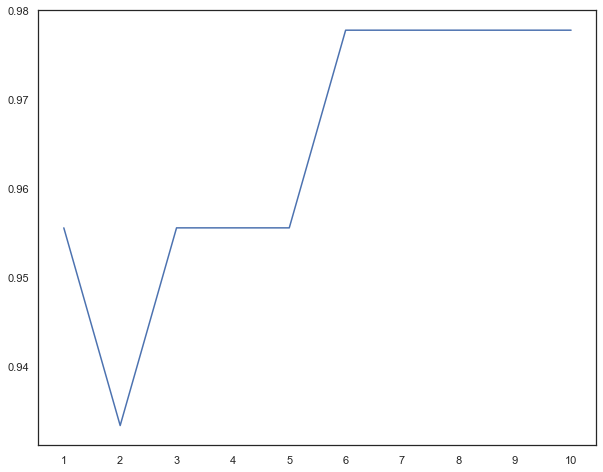

In [284]:
a_index = list(range(1,11))

a = pd.Series()

for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    a = a.append(pd.Series(accuracy_score(y_test, prediction)))
    
plt.figure(figsize=(10,8))    
plt.plot(a_index, a)
plt.xticks(a_index)

In [329]:
# changing to misclassification error
MSE = [1 - x for x in a]

# finding best k
best_k = a_index[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 6.


The accuracy of the KNN after tuning k is 0.9777777777777777


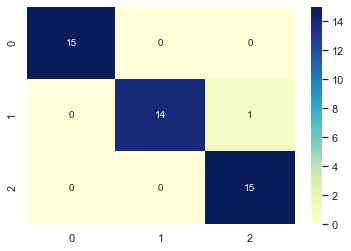

In [330]:
knn2 = KNeighborsClassifier(n_neighbors=6)
knn2.fit(X_train, y_train)
knn2_pred = knn2.predict(X_test)

print('The accuracy of the KNN after tuning k is', accuracy_score(y_test,knn2_pred))
knn2_matrix = confusion_matrix(y_test, knn2_pred)
sns.heatmap(knn2_matrix,cmap="YlGnBu", annot=True, fmt="d")

### Analyze the best models and their errors

We will often gain good insights on the problem by inspecting the best models. For example, the RandomForestClassifier can indicate the relative importance of each attribute for making accurate predictions:

In [307]:
feature_importances = rnd_search.best_estimator_.feature_importances_

feature_importances

array([0.12947137, 0.01817091, 0.45371627, 0.39864146])

It seems that PetalLengthCm is the most important features here, followed by PetalWidthCm.

<b> 1. KNN:
    
Pros of kNN:
- Non-parametric, No assumption on data, not much data preparation (normalization etc)
- Insensitive to outliers
- Simple but relatively high accuracy
    
Cons kNN:
- High memory requirement (as it needs all data to make prediction)
- Computational expensive (same reason)
- Could be slow if database is large (same reason)
    
Examples of kNN
- Loan ratings: Collect financial characteristics of people (their savings, their credits, late payment, etc) and determin should be borrow money to this person
- University entrace: Collect data on the academic results, extra-curricular activities and determine if this person should go to Uni
- Politics: knowing the political preferences of a person and predict who he/she will vote for

<b> 2. Decision Tree:
    
Pros of Decision Tree:
- Simple to understand and visualize
- Fast to identify significant variables, useful for quick data exploration
- Relatively insensitive to outlier, not much data clearning require
- Non-parametric, no assumption about data

Cons of Decision Tree:
- Overfitting : could be solved by random forest
- Suboptimal decision tree: Greedy algorithm can't guarantee globally optimal tree, solved by RF
- Information lost: When work with continous variable, information might be loose when it categorizes variables by making cut-offs

<b> 3. Random Forest:

Pros of RF:
- It could handle large data set with high dimensionality, output Importance of Variable, useful to explore the data
- Could handle missing data while maintaining accuracy

Cons of RF:
- Could be a black box, users have little control on what the model does

<b> 4. Support Vector Machine:

Pros of SVM:
- Effective in high dimensional space (even when it's greater than no. of samples)
- Memory efficient, because it only uses a few training points as support vectors
- Performs well if there is clear margin of separation

Cons of SVM:
- Long training time if data set is large
- Does not perform well if there are overlaps in target classes (noises)  
    
<i> Reference: https://www.kaggle.com/anniepyim/essential-classification-algorithms-explained

## Evaluate Your System on the Test Set

In [112]:
final_model = best_model_random.best_estimator_

X_test = test_set.drop("Species", axis=1)
y_test = test_set["Species"].copy()
y_test = LabelEncoder().fit_transform(y_test)
y_test

array([2, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2,
       1])

In [106]:
num_attribs = list(iris_num)

num_pipeline = Pipeline([
                        ('std_scaler', StandardScaler()),
                        ])

iris_num_tr = num_pipeline.fit_transform(iris_num)

full_pipeline = ColumnTransformer([
                                ("num", num_pipeline, num_attribs),
                                ])
iris_prepared = full_pipeline.fit_transform(iris_num)

In [107]:
X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

In [113]:
print(accuracy_score(y_test, final_predictions))
print(classification_report(y_test, final_predictions))
print(confusion_matrix(y_test, final_predictions))

0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.93      0.87      0.90        15
           2       0.88      1.00      0.94        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

[[14  1  0]
 [ 0 13  2]
 [ 0  0 15]]


In [ ]:
import pickle

filename = '/chau_iris.pkl'
pickle.dump(rfc, open(filename, 'wb'))